In [110]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import scipy as scp
import sympy as smp

def findmax(spline, a, b):
    range = np.linspace(a,b,2000)
    currmax = 0
    elmax = a
    for el in range:
        if spline(el) >= currmax:
            currmax = spline(el)
            elmax = el
    return (currmax, elmax)


In [111]:
D = 11*25.4 / 1000 # propellr diameter
rho = 1.22 # air density
omega3000 = 3000 * 2 * np.pi / 60 # 
omega4000 = 4000 * 2 * np.pi / 60 # 
omega5000 = 5000 * 2 * np.pi / 60 # 
omega6000 = 6000 * 2 * np.pi / 60 # 
omega7000 = 7000 * 2 * np.pi / 60 #
omega8000 = 8000 * 2 * np.pi / 60 # 
omega9000 = 9000 * 2 * np.pi / 60 # 

'''om - RPM, Va - m/sec'''
def AR(om, Va):
    Om = om * 2 * np.pi / 60
    return 2*np.pi*Va/(Om*D)

'''om - RPM'''
def Vel(AR, om):
    om = om * 2 * np.pi / 60
    return om * D * AR / (2*np.pi)

Static = np.loadtxt("Static.txt", skiprows=1)
D3000 = np.loadtxt("3000RPM.txt", skiprows=1)
D6000 = np.loadtxt("6000RPM.txt", skiprows=1)
D4000 = np.loadtxt("4000RPM.txt", skiprows=1)
D5000 = np.loadtxt("5000RPM.txt", skiprows=1)
Va6000 = D6000[:, 0]* omega6000 * D / (2 * np.pi)
Va6000 = np.linspace(Va6000[0], Va6000[-1], len(D6000[:,0]))
Va3000 = D3000[:, 0]* omega3000 * D / (2 * np.pi)
Va3000 = np.linspace(Va3000[0], Va3000[-1], len(D3000[:,0]))
Va4000 = D4000[:, 0]* omega4000 * D / (2 * np.pi)
Va4000 = np.linspace(Va4000[0], Va4000[-1], len(D4000[:,0]))
Va5000 = D5000[:, 0]* omega5000 * D / (2 * np.pi)

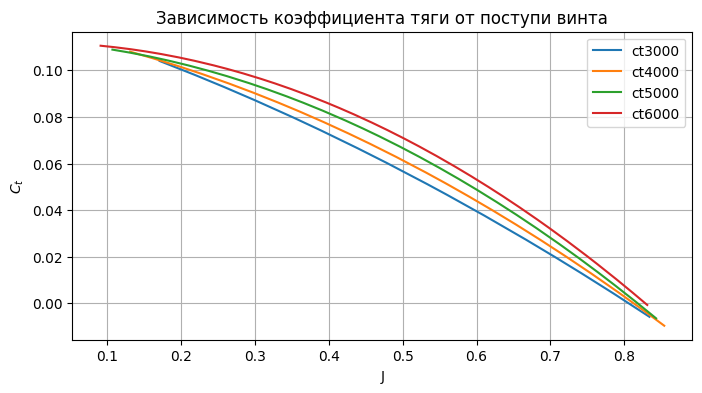

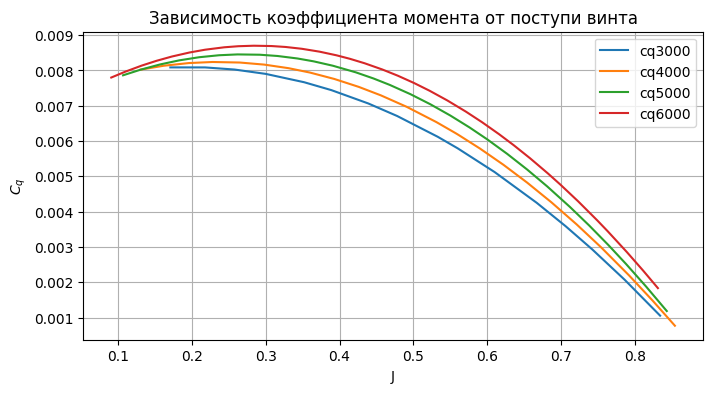

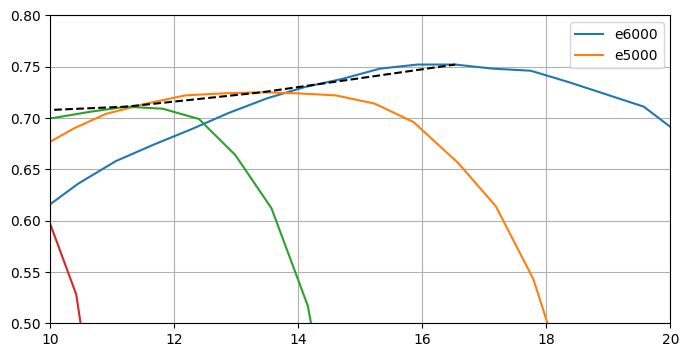

In [112]:
p3000ct = np.polyfit(D3000[:, 0], D3000[:, 1], 2)
p3000cq = np.polyfit(D3000[:, 0], D3000[:, 2]/(2*np.pi), 2)
p6000ct = np.polyfit(D6000[:, 0], D6000[:, 1], 2)
p6000cq = np.polyfit(D6000[:, 0], D6000[:, 2]/(2*np.pi), 2)
p4000ct = np.polyfit(D4000[:, 0], D4000[:, 1], 2)
p4000cq = np.polyfit(D4000[:, 0], D4000[:, 2]/(2*np.pi), 2)
p5000ct = np.polyfit(D5000[:, 0], D5000[:, 1], 2)
p5000cq = np.polyfit(D5000[:, 0], D5000[:, 2]/(2*np.pi), 2)

f3000ct = interp1d(D3000[:, 0], D3000[:, 1], 'cubic')
f6000ct = interp1d(D6000[:, 0], D6000[:, 1], 'cubic')
f4000ct = interp1d(D4000[:, 0], D4000[:, 1], 'cubic')
f5000ct = interp1d(D5000[:, 0], D5000[:, 1], 'cubic')

feta3 = interp1d(Va3000, D3000[:, 3])
e3m, v3m = findmax(feta3, 5, 10)
feta4 = interp1d(Va4000, D4000[:, 3])
e4m, v4m = findmax(feta4, 5, 15)
feta5 = interp1d(Va5000, D5000[:, 3])
e5m, v5m = findmax(feta5, 10, 18)
feta6 = interp1d(Va6000, D6000[:, 3])
e6m, v6m = findmax(feta6, 10, 20)


fig, ax2 = plt.subplots(1,1, figsize=(8,4))

ax2.plot(D3000[:, 0], np.polyval(p3000ct, D3000[:, 0]), label = 'ct3000')
ax2.plot(D4000[:, 0], np.polyval(p4000ct, D4000[:, 0]), label = 'ct4000')
ax2.plot(D5000[:, 0], np.polyval(p5000ct, D5000[:, 0]), label = 'ct5000')
ax2.plot(D6000[:, 0], np.polyval(p6000ct, D6000[:, 0]), label = 'ct6000')
ax2.set_xlabel('J')
ax2.set_ylabel(r'$C_t$')
ax2.set_title('Зависимость коэффициента тяги от поступи винта')
ax2.legend()
ax2.grid('Major')
fig, ax3 = plt.subplots(1,1, figsize=(8,4))

ax3.plot(D3000[:, 0], np.polyval(p3000cq, D3000[:, 0]), label = 'cq3000')
ax3.plot(D4000[:, 0], np.polyval(p4000cq, D4000[:, 0]), label = 'cq4000')
ax3.plot(D5000[:, 0], np.polyval(p5000cq, D5000[:, 0]), label = 'cq5000')
ax3.plot(D6000[:, 0], np.polyval(p6000cq, D6000[:, 0]), label = 'cq6000')
ax3.set_xlabel('J')
ax3.set_ylabel(r'$C_q$')
ax3.set_title('Зависимость коэффициента момента от поступи винта')
ax3.legend()
ax3.grid('Major')

# Интерполируем зависимость пика эффективности винта от скорости, набегающего потока (3 график), 
# чтобы понять, какая максимальная эффективность и на каких оборотах при выбранном значении воздушной скорости

feta = interp1d([v3m, v4m, v5m, v6m], [e3m, e4m, e5m, e6m])

fig, ax4 = plt.subplots(1,1, figsize=(8,4))

ax4.plot(Va6000, D6000[:, 3], label='e6000')
ax4.plot(Va5000, D5000[:, 3], label='e5000')
ax4.plot(Va4000, D4000[:, 3])
ax4.plot(Va3000, D3000[:, 3])
ax4.plot(np.linspace(v3m, v6m, 100), feta(np.linspace(v3m, v6m, 100)), '--', color='black')
ax4.legend()
ax4.set_ylim(0.5, 0.8)
ax4.set_xlim(10, 20)
ax4.grid('Major')


Text(0.5, 1.0, 'Тяга воздушного винта APC 11x80')

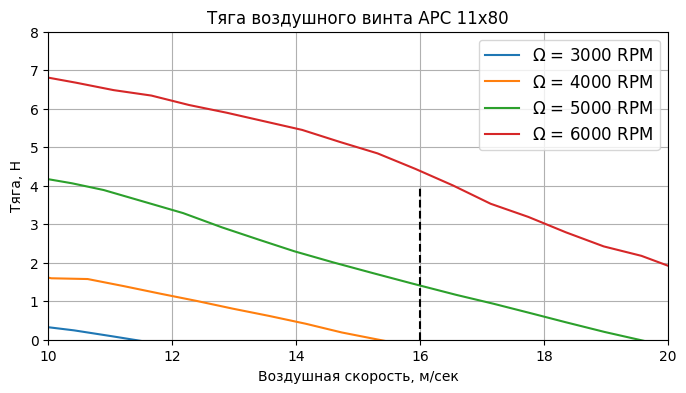

In [113]:
T3 = rho*D**4/(4*np.pi**2)*(omega3000**2)*f3000ct(D3000[:, 0])
T4 = rho*D**4/(4*np.pi**2)*(omega4000**2)*f4000ct(D4000[:, 0])
T5 = rho*D**4/(4*np.pi**2)*(omega5000**2)*f5000ct(D5000[:, 0])
T6 = rho*D**4/(4*np.pi**2)*(omega6000**2)*f6000ct(D6000[:, 0])
T7 = rho*D**4/(4*np.pi**2)*(omega7000**2)*f6000ct(D6000[:, 0])
T8 = rho*D**4/(4*np.pi**2)*(omega8000**2)*f6000ct(D6000[:, 0])
fig1, ax1 = plt.subplots(1,1, figsize=(8,4))
ax1.plot(Va3000, T3, label = r'$\Omega$ = 3000 RPM')
ax1.plot(Va4000, T4, label = r'$\Omega$ = 4000 RPM')
ax1.plot(Va5000, T5, label = r'$\Omega$ = 5000 RPM') 
ax1.plot(Va6000, T6, label = r'$\Omega$ = 6000 RPM') 
# ax1.plot(Va6000, T7, '--',label = r'$\Omega$ = 7000 RPM') 
# ax1.plot(Va6000, T8, '--',label = r'$\Omega$ = 8000 RPM')
ax1.set_xlim(10, 20)
ax1.set_ylim(0, 8)
ax1.vlines(16, 0, 4, color='black', linestyles='--')
ax1.legend(fontsize=12)
ax1.grid('Major')
ax1.set_xlabel('Воздушная скорость, м/сек')
ax1.set_ylabel('Тяга, Н')
ax1.set_title('Тяга воздушного винта APC 11x80')

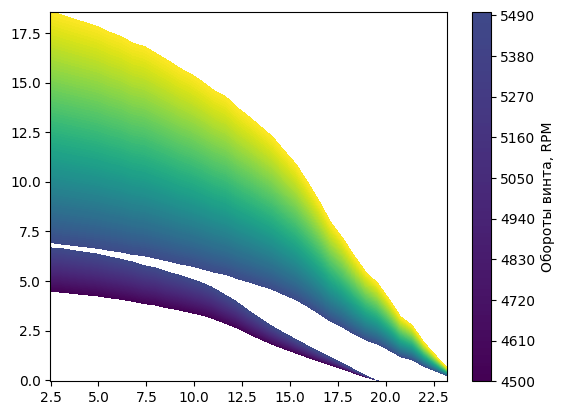

In [114]:
def Thrust55(Va, Om, J):
    return rho*D**4/(4*np.pi**2)*(Om)**2*f6000ct(J)

def Thrust45(Va, Om, J):
    return rho*D**4/(4*np.pi**2)*(Om)**2*f5000ct(J)

Om55 = np.linspace(5500, 9000, len(D6000[:,0])) * 2 * np.pi / 60
X55, Y55 = np.meshgrid(Va6000, Om55)
Z5500 = Thrust55(X55, Y55, D6000[:,0])
Om45 = np.linspace(4500, 5500, len(D5000[:,0])) * 2 * np.pi / 60
X45, Y45 = np.meshgrid(Va5000, Om45)
Z4500 = Thrust45(X45, Y45, D5000[:,0])
fig, ax = plt.subplots(1,1)
a =ax.contourf(X55, Z5500, Y55/2/np.pi*60, cmap='viridis', levels=100, vmin = 4500, vmax = 9000)
b = ax.contourf(X45, Z4500, Y45/2/np.pi*60, cmap='viridis', levels=100, vmin = 4500, vmax = 9000)
fig.colorbar(mappable=b, label='Обороты винта, RPM')

## Данные по мотору

In [115]:
MD = np.loadtxt('C:/Users/PC/Education/SKAT2025/KB-102_SKAT_2025/ПромежуточныйДизайн/СиловаяУстановка/AT2820.txt', skiprows=1)
i0 = float(MD[1, 2])
R = float(MD[1, 1])
kv = MD[1,0] # RPM/volts
kv = float(2*np.pi * kv /60 ) # Volts/(rad/sec)
kq = float(1/kv)
kv = kv**-1
MD

array([[8.80e+02, 3.90e-02, 1.60e+00, 1.39e-01],
       [1.05e+03, 2.80e-02, 2.00e+00, 1.39e-01]])

In [116]:
v = smp.symbols('v', real=True, positive=True)
Qm = kq*(1/R * (v - kv*omega6000) - i0)
Qp = (rho * D**5 * omega6000**2) / (4*np.pi**2) * float(np.polyval(p6000cq, AR(6000, 16)))
smp.solve(Qm-Qp)
Qp

0.14148840054815143

In [117]:
delta = 0.46
Vin = 16.8 * delta
Va = 17

a = (rho * D**5)/(2*np.pi)**2 * p6000cq[-1]
b = (rho * D**4)/(2*np.pi)*p6000cq[1]*Va + kq*kv/R
c = rho*D**3 * p6000cq[0] * Va**2 - kq/R*Vin + kq*i0

o = (-b + np.sqrt(b**2 - 4*a*c)) / (2*a) # rad/sec
o*60/2/np.pi, Vin, (Vin - kv*o)/R - i0

(np.float64(7296.145463745765),
 7.728000000000001,
 np.float64(25.831786947422973))

In [118]:
mechPower = omega6000**3 * rho * D**5/(4*np.pi**2) * np.polyval(p6000cq, AR(6000, 16))
425/mechPower

np.float64(4.780664036910639)

In [119]:
def GetTorque(om):
    Om = om * 2 * np.pi / 60
    return (rho * D**5 * Om**2) * np.polyval(p6000cq, AR(6000, 16)) / (4*np.pi**2)

def GetMotEff(om, Vinp):
    Om = om * 2 * np.pi / 60
    return Om*kq/Vinp * (1 - R*i0/(Vinp - kv*Om))

Qp = GetTorque(6000)
(Qp/kv + i0)*R + kv*omega6000, Qp

(np.float64(6.205894655621352), np.float64(0.14148840054815143))

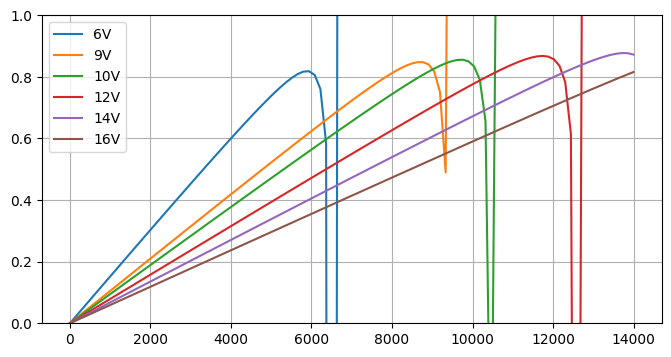

In [123]:
fig5, ax5 = plt.subplots(1,1, figsize=(8,4))
omeg = np.linspace(0, 14000, 100)
ax5.plot(omeg, GetMotEff(omeg, 6.2), label='6V')
ax5.plot(omeg, GetMotEff(omeg, 9), label='9V')
ax5.plot(omeg, GetMotEff(omeg, 10), label='10V')
ax5.plot(omeg, GetMotEff(omeg, 12), label='12V')
ax5.plot(omeg, GetMotEff(omeg, 14), label='14V')
ax5.plot(omeg, GetMotEff(omeg, 16), label='16V')
ax5.legend()
ax5.set_ylim(0,1)
ax5.grid('Major')